In [6]:
## Gradient Descent for Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
plt.style.use('ggplot')

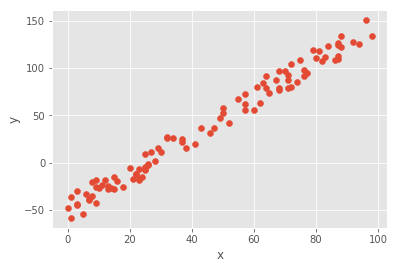

In [52]:
np.random.seed(1)

X = np.random.randint(0, 100, 100)
# Target variable
# y = 2x - 50 + ϵ (noise)
y = 2*X - 50 + np.random.uniform(-15, 15, 100)

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

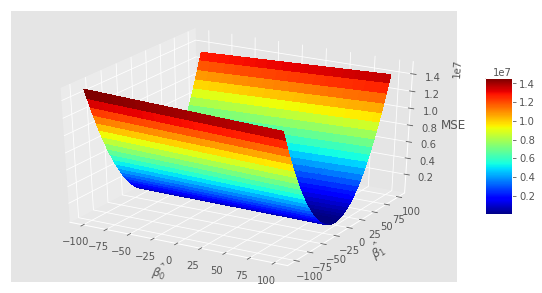

In [53]:
# Try each integer for beta 0 and beta 1 between -100 and 100
beta_0 = beta_1 = np.arange(-100, 100, 1)

# All combinations of beta_0 and beta_1
plt_beta_0, plt_beta_1 = np.meshgrid(beta_0, beta_1)

def calculate_mse(beta_0, beta_1):
    y_hat = beta_0 + beta_1 * X
    error = y_hat - y
    sse = np.sum(error ** 2)
    return ((1 / (2 * len(X))) * sse)

calculate_mse_v = np.vectorize(calculate_mse)
mse = calculate_mse_v(plt_beta_0, plt_beta_1).reshape(len(plt_beta_0), len(plt_beta_1))

fig = plt.figure(figsize=(10, 5))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(plt_beta_0,
                       plt_beta_1,
                       mse,
                       cmap=cm.jet,
                       linewidth=0,
                       antialiased=False)
ax.set_xlabel(r'$\hat{\beta_0}$')
ax.set_ylabel(r'$\hat{\beta_1}$')
ax.set_zlabel(r'MSE')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

y = -51 + 2x


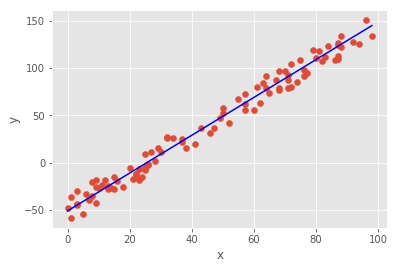

In [54]:
beta_1_idx, beta_0_idx = np.unravel_index(mse.argmin(), mse.shape)


# Retrieve values of beta_0 and beta_1 for which
# SSE is lowest
beta_0_hat = beta_0[beta_0_idx]
beta_1_hat = beta_1[beta_1_idx]


# Print model parameters
print("y = {} + {}x".format(beta_0_hat, beta_1_hat))


# Plot a line for our model
plt.scatter(X, y)
plt.plot(
    [min(X), max(X)],
    [min(X) * beta_1_hat + beta_0_hat, max(X) * beta_1_hat + beta_0_hat],
    color='blue'
)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [55]:
#X = np.random.randint(0, 100, 100)
X = np.array([np.ones(len(X)), X])
X

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.],
       [ 37.,  12.,  72.,   9.,  75.,   5.,  79.,  64.,  16.,   1.,  76.,
         71.,   6.,  25.,  50.,  20.,  18.,  84.,  11.,  28.,  29.,  14.,
         50.,  68.,  87.,  87.,  94.,  96.,  86.,  13.,   9.,   7.,  63.,
         61.,  22.,  57.,   1.,   0.,  60.,  81.,   8.,  88.,  13.,  47.,
         72.,  30.,  71

In [56]:
#X = np.array([np.ones(len(X)), X])
alpha = 0.0005
iterations = 100000
beta_0_hat = 1
beta_1_hat = 1
mses = []

for i in range(1, iterations+1):
    y_hat = beta_0_hat * X[0] + beta_1_hat * X[1]
    error = y_hat - y
    sse = np.sum(error ** 2)
    mse = ((1 / (2 * len(X.T))) * sse)
    mses.append(mse)
    
    gradient = np.dot(X, error) / len(X.T)
    beta_0_hat = beta_0_hat - (gradient[0] * alpha)
    beta_1_hat = beta_1_hat - (gradient[1] * alpha)
    
    if i % 10000 == 0:
        print("Iteration {}, MSE={}, β0={}, β1={}".format(
            i, round(mse, 3), round(beta_0_hat, 3), round(beta_1_hat, 3)))

Iteration 10000, MSE=53.152, β0=-38.628, β1=1.791
Iteration 20000, MSE=34.885, β0=-47.416, β1=1.929
Iteration 30000, MSE=33.986, β0=-49.364, β1=1.959
Iteration 40000, MSE=33.942, β0=-49.796, β1=1.966
Iteration 50000, MSE=33.94, β0=-49.892, β1=1.967
Iteration 60000, MSE=33.94, β0=-49.913, β1=1.968
Iteration 70000, MSE=33.94, β0=-49.918, β1=1.968
Iteration 80000, MSE=33.94, β0=-49.919, β1=1.968
Iteration 90000, MSE=33.94, β0=-49.919, β1=1.968
Iteration 100000, MSE=33.94, β0=-49.919, β1=1.968


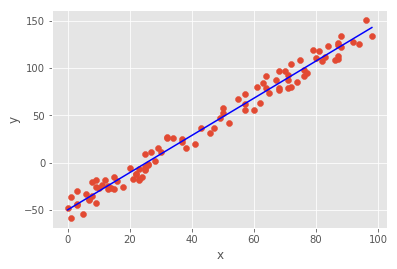

In [57]:
plt.scatter(X[1], y)
plt.plot(
    [min(X[1]), max(X[1])],
    [min(X[1]) * beta_1_hat + beta_0_hat, max(X[1]) * beta_1_hat + beta_0_hat],
    color='blue'
)
plt.xlabel('x')
plt.ylabel('y')
plt.show()